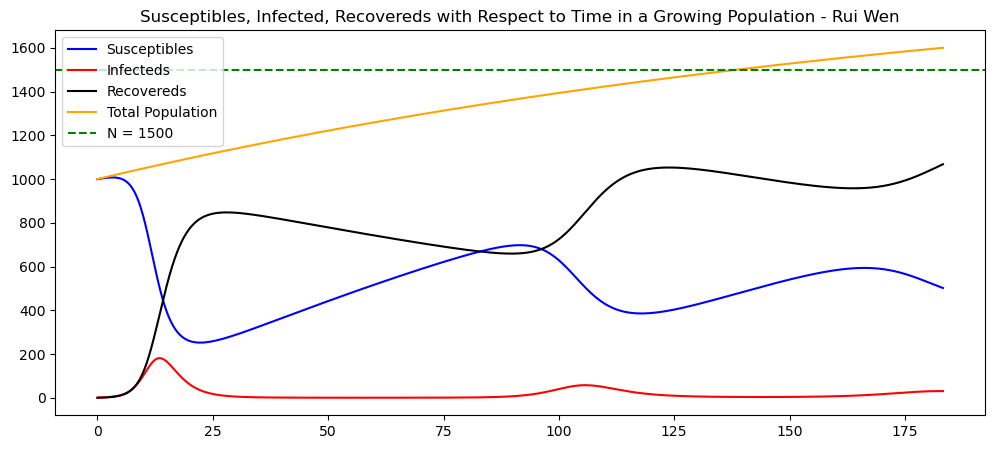

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
plt=reload(plt)

def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_deaths, mu_births, t_max, stepsize, stop_pop_drop):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N_arr = np.zeros(len(T))
    N_max = stop_pop_drop
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N_arr[idx] = S0 + I0 + R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - mu_deaths*S[idx-1] + mu_births*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - mu_deaths*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_deaths*R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N_arr[idx] = S[idx] + I[idx] + R[idx]
            
        if N_arr[idx] >= N_max:
            return S[:idx + 1], I[:idx + 1], R[:idx + 1], N_arr[:idx + 1], T[:idx + 1]
    
    if (S[-1] + I[-1] + R[-1]) < N_max:
        print ("Increase T Max, insufficient population.")
        return 0, 0, 0, 0, 0
    
    return S, I, R, N_arr, T

# def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_deaths, mu_births, t_max, stepsize):

fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(12,5))
beta = 1
gamma = 0.5
mu_births = 0.01
mu_deaths = mu_births / 2
max_t = 500

S, I, R, N, T = SIR_birthdeath(999, 1, 0, beta, gamma, mu_deaths, mu_births, max_t, 0.05, 1600)
axs.plot(T, S, color='blue', label='Susceptibles')
axs.plot(T, I, color='red', label='Infecteds')
axs.plot(T, R, color='black', label='Recovereds')
axs.plot(T, N, color='orange', label='Total Population')
axs.axhline(y=1500, color='green', linestyle='dashed', label="N = 1500")
plt.title("Susceptibles, Infected, Recovereds with Respect to Time in a Growing Population - Rui Wen")
axs.legend()